<a href="https://colab.research.google.com/github/Gladn/Colaboratory_new/blob/main/mediapipeROCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.4 MB 22 kB/s 
     |████████████████████████████████| 394.4 MB 23 kB/s 
     |████████████████████████████████| 33.0 MB 93.8 MB/s 
     |████████████████████████████████| 3.8 MB 55.3 MB/s 
     |████████████████████████████████| 462 kB 55.2 MB/s 
     |████████████████████████████████| 2.9 MB 12.6 MB/s 
     |████████████████████████████████| 132 kB 62.1 MB/s 
     |████████████████████████████████| 14.9 MB 57.4 MB/s 
     |████████████████████████████████| 33.0 MB 327 kB/s 
     |████████████████████████████████| 31.5 MB 75.5 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=b32b4db9f32fd900f3925f2a33f7adbbb9a4a3d9281da686a225f069cb96129a
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(False)
npDraw = mp.solutions.drawing_utils
pTime = 0
cTime = 0

In [4]:
# инициализировать класс Hands и сохранить его в переменной.
mp_hands = mp.solutions.hands
# установить функцию рук, которая будет удерживать точки ориентиров.
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)
# настроить функцию рисования ориентиров рук на изображении
mp_drawing = mp.solutions.drawing_utils

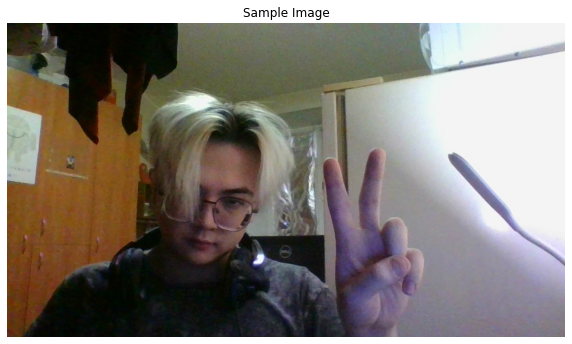

In [5]:
# чтение изображения
sample_img = cv2.imread('/content/C1.jpg')
# размер  и отображение плота
plt.figure(figsize = [10, 10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [6]:
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.multi_hand_landmarks:
   for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

HAND NUMBER: 1
-----------------------
WRIST:
x: 0.6606552600860596
y: 0.9518865346908569
z: 5.348014724404493e-07

THUMB_CMC:
x: 0.6286455392837524
y: 0.9269967079162598
z: -0.05605410039424896



In [7]:
image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):    
            print(f'{mp_hands.HandLandmark(i).name}:') 
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}n')

HAND NUMBER: 1
-----------------------
WRIST:
x: 845.6387329101562
y: 685.358304977417
z: 0.0006845458847237751n
THUMB_CMC:
x: 804.6662902832031
y: 667.437629699707
z: -71.74924850463867n


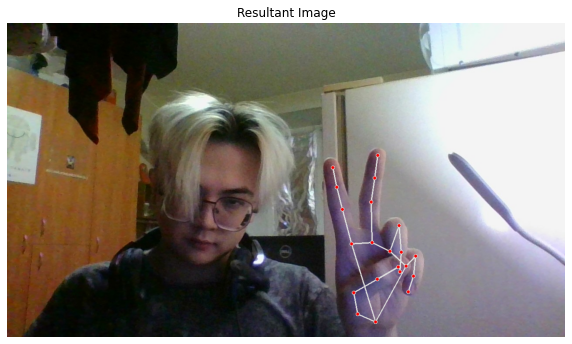

In [8]:
img_copy = sample_img.copy()
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
if results.multi_hand_landmarks:
    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])
    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

In [9]:
for landmarks in hand_landmarks.landmark:
        print(landmarks)

x: 0.6606552600860596
y: 0.9518865346908569
z: 5.348014724404493e-07

x: 0.6286455392837524
y: 0.9269967079162598
z: -0.05605410039424896

x: 0.621856689453125
y: 0.8584190607070923
z: -0.0855974406003952

x: 0.6634607911109924
y: 0.8161855340003967
z: -0.11017347127199173

x: 0.701313853263855
y: 0.7773921489715576
z: -0.13182218372821808

x: 0.6175851821899414
y: 0.7036964297294617
z: -0.05141916871070862

x: 0.6011611819267273
y: 0.5937689542770386
z: -0.08167218416929245

x: 0.591122031211853
y: 0.5231496691703796
z: -0.10203886777162552

x: 0.5839311480522156
y: 0.46041449904441833
z: -0.11641713976860046

x: 0.6546673774719238
y: 0.6996572613716125
z: -0.045772045850753784

x: 0.6526783108711243
y: 0.5706810355186462
z: -0.07743712514638901

x: 0.6590591669082642
y: 0.4931023120880127
z: -0.09716399013996124

x: 0.664425253868103
y: 0.4218297004699707
z: -0.1082296147942543

x: 0.6861711740493774
y: 0.7272185683250427
z: -0.04634369537234306

x: 0.7024303078651428
y: 0.6447634696

In [10]:
fingerCount = 0
if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        # Получить указатель руки для проверки метки (левый или правый)
        handIndex = results.multi_hand_landmarks.index(hand_landmarks)
        handLabel = results.multi_handedness[handIndex].classification[0].label
        # Установите переменную, чтобы сохранить положение ориентиров (x и y)
        handLandmarks = []

        # Заполните список позициями x и y 
        for landmarks in hand_landmarks.landmark:
          handLandmarks.append([landmarks.x, landmarks.y])

        # Большие пальцы
        if handLabel == "Left" and handLandmarks[4][0] > handLandmarks[3][0]:
          fingerCount = fingerCount+1
        elif handLabel == "Right" and handLandmarks[4][0] < handLandmarks[3][0]:
          fingerCount = fingerCount+1

        # положение пальцев
        #Указательный
        if handLandmarks[8][1] < handLandmarks[6][1]:      
          fingerCount = fingerCount+1
        #Средний
        if handLandmarks[12][1] < handLandmarks[10][1]:     
          fingerCount = fingerCount+1
        #
        if handLandmarks[16][1] < handLandmarks[14][1]:     
          fingerCount = fingerCount+1
        if handLandmarks[20][1] < handLandmarks[18][1]:     
          fingerCount = fingerCount+1

print(fingerCount)

2


In [11]:
rbool = 0
lbool = 0
if handLabel == "Right" and handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > handLandmarks[10][1] and handLandmarks[16][1] > handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: rbool = 1
print("Рука справа: ", rbool)
if handLabel == "Left" and handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > handLandmarks[10][1] and handLandmarks[16][1] > handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: lbool = 1
print("Рука слева: ", lbool)


Рука справа:  0
Рука слева:  0


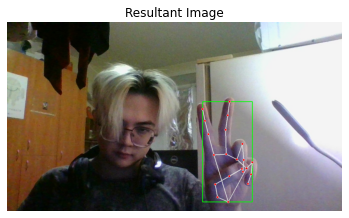

In [12]:
mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils


frame = img_copy

h, w, c = frame.shape

hand_landmarks = results.multi_hand_landmarks
if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)

plt.title("Resultant Image");plt.axis('off');plt.imshow(frame[:,:,::-1]);plt.show()



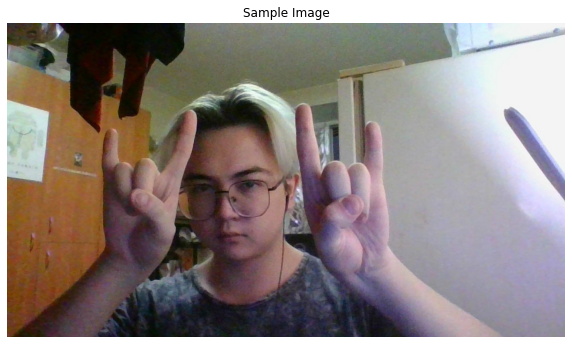

HAND NUMBER: 1
-----------------------
WRIST:
x: 0.6414405107498169
y: 0.7635535001754761
z: 1.3873105331185798e-07

THUMB_CMC:
x: 0.5999199151992798
y: 0.7539616227149963
z: -0.05230338126420975

HAND NUMBER: 2
-----------------------
WRIST:
x: 0.22375814616680145
y: 0.7486683130264282
z: 3.0059315037078704e-08

THUMB_CMC:
x: 0.26234352588653564
y: 0.7276748418807983
z: -0.0366285964846611

HAND NUMBER: 1
-----------------------
WRIST:
x: 821.0438537597656
y: 549.7585201263428
z: 0.0001775757482391782n
THUMB_CMC:
x: 767.8974914550781
y: 542.8523683547974
z: -66.94832801818848n
HAND NUMBER: 2
-----------------------
WRIST:
x: 286.41042709350586
y: 539.0411853790283
z: 3.847592324746074e-05n
THUMB_CMC:
x: 335.7997131347656
y: 523.9258861541748
z: -46.88460350036621n


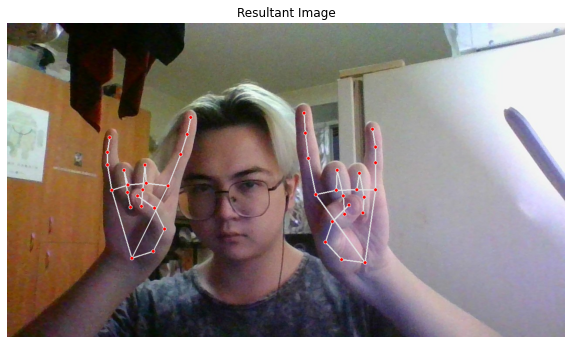

4
Рука слева:  1
Рука справа:  1


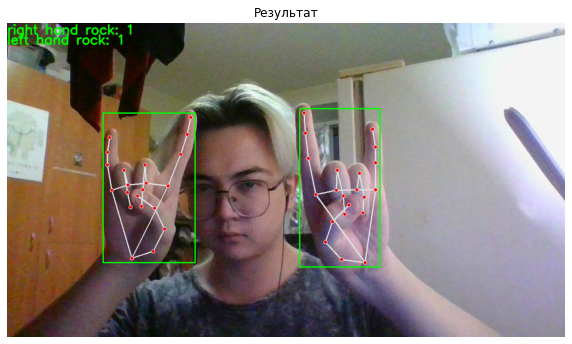

In [14]:
sample_img = cv2.imread('/content/C6.jpg')
plt.figure(figsize = [10, 10])
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.multi_hand_landmarks:
    
   for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')
        
        for i in range(2):    
            print(f'{mp_hands.HandLandmark(i).name}:') 
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}n')
img_copy = sample_img.copy()

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])

    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()
fingerCount = 0
rbool = 0
lbool = 0
if results.multi_hand_landmarks:

      for hand_landmarks in results.multi_hand_landmarks:
        #  left or right
        handIndex = results.multi_hand_landmarks.index(hand_landmarks)
        handLabel = results.multi_handedness[handIndex].classification[0].label


        handLandmarks = []

        for landmarks in hand_landmarks.landmark:
          handLandmarks.append([landmarks.x, landmarks.y])


        if handLabel == "Left" and handLandmarks[4][0] > handLandmarks[3][0]:
          fingerCount = fingerCount+1
        elif handLabel == "Right" and handLandmarks[4][0] < handLandmarks[3][0]:
          fingerCount = fingerCount+1

        if handLandmarks[8][1] < handLandmarks[6][1]:       
          fingerCount = fingerCount+1
        if handLandmarks[12][1] < handLandmarks[10][1]:    
          fingerCount = fingerCount+1
        if handLandmarks[16][1] < handLandmarks[14][1]:    
          fingerCount = fingerCount+1
        if handLandmarks[20][1] < handLandmarks[18][1]:     
          fingerCount = fingerCount+1

        if handLabel == "Right" and handLandmarks[4][0] > handLandmarks[3][0] and handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] > handLandmarks[10][1] and handLandmarks[16][1] > handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: rbool = 1

        if handLabel == "Left" and handLandmarks[4][0] < handLandmarks[3][0] and  handLandmarks[8][1] < handLandmarks[6][1] and handLandmarks[12][1] >  handLandmarks[10][1] and handLandmarks[16][1] >  handLandmarks[14][1] and handLandmarks[20][1] < handLandmarks[18][1]: lbool = 1




print(fingerCount)
print("Рука слева: ", lbool)
print("Рука справа: ", rbool)

mp_drawing = mp.solutions.drawing_utils


frame = img_copy

h, w, c = frame.shape

hand_landmarks2 = results.multi_hand_landmarks
if hand_landmarks2:
        for handLMs in hand_landmarks2:
            x_max = 0
            y_max = 0
            x_min = w 
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            cv2.rectangle(frame, (x_min - 10, y_min - 10), (x_max + 10, y_max+ 10), (0, 255, 0), 2)
            if lbool == 0:
              cv2.putText(frame, 'right hand rock: 0', (00, 25), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)
            if lbool == 1:
              cv2.putText(frame, 'right hand rock: 1', (00, 25), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)
            if rbool == 0:
              cv2.putText(frame, 'left hand rock: 0', (00, 48), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)
            if rbool == 1:
              cv2.putText(frame, 'left hand rock: 1', (00, 48), cv2.FONT_HERSHEY_SIMPLEX, 1,(0, 255, 0), 2, cv2.LINE_AA, False)

            
            #mp_drawing.draw_landmarks(frame, handLMs, mphands.HAND_CONNECTIONS)
            #mp_drawing.draw_landmarks(frame, landmark_list = hand_landmarks, connections = mp_hands.HAND_CONNECTIONS)

fig = plt.figure(figsize = [10, 10])
plt.title("Результат");plt.axis('off');plt.imshow(frame[:,:,::-1]);plt.show()